# Project: Investigate a Dataset (Tmdb-Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 
>**in this project will analyse dataset contain data about 10000 moives is collected from tmdb <br>
> in this dataset have many columns to describe this data**.<br>
<br>
1.id: the id of moive in dataset<br> 
2.imdb_id: id of website imdb<br>
3.popularity: value of poluarity of the moive<br>
4.budget: the budget to produce moive<br>
5.revenue: earning When the movie is released <br>
6.original_title : title of moive <br>
7.cast :cast of actors in moive <br>
8.homepage: linke url to movie website<br>
9.director: names of dirctors produce moive<br>
10.tagline<br>
11.keywords<br>
12.overview<br>
13.runtime: the time of run moive<br>
14.genres:types of moives like drama,action,etc...<br>
15.production_companies: companies name produce moives<br>
16.release_date: date when moive release<br>
17.vote_count:number of votes to rate movie<br>
18.vote_average: comoute average of votes<br>
19.release_year: year this moive release<br>
20.budget_adj<br>
21.revenue_adj<br>
### Exploratory questions:
#### 1.What is the most genres of moive produced ?
#### 2.The most companies producing moives ? 
#### 3.Most of the moives industry directors ? 
#### 4.Show the relationship between popularity of moives and release year ?
#### 5.Show the relationship between budget of moives and release year ?

In [1]:
#import libs that use in project .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

>load tmdb-moives.<br>
and show this data.


In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09



## general properties
#### (1) know num.of columns and rows



In [3]:
df.shape

(10866, 21)



#### (2) know data types of col && how much null valuse in dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning (Replace this with more specific notes!)



#### (1) drop all col not use in analysis



In [5]:
label_drop=['imdb_id','id','tagline','overview','keywords','homepage','release_date','budget_adj','revenue_adj','tagline']
df.drop(label_drop,axis=1,inplace=True)




#### (2) know num.of columns have null valuse



In [6]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64


#### (3) drop all rows have null values



In [7]:
df.dropna(inplace=True)


#### (4) drop or delete any row have value '0' in col budget



In [8]:
df.drop(df.index[df['budget'] == 0], inplace = True)


#### (5) drop or delete any row have value '0' in col revenue



In [9]:
df.drop(df.index[df['revenue'] == 0], inplace = True)


#### (6)check if dataset have more null valuse



In [10]:
df.isnull().sum().any()

False


#### (7) check if any rows is duplicated



In [11]:
df.duplicated().sum()

1


#### (8) delete any row is duplicate if is exit



In [12]:
df.drop_duplicates(inplace=True)


#### (9) show '5' rows of dataset after my cleaning on it



In [13]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [14]:
#function to compute most values of any columans and search in all row in dataset
def themost(col_name):
    #get index of max value i need
    index=df[col_name].idxmax()
    #return row that conatin this value and other columans
    return df.loc[index]

In [15]:
#function to compute most values of any columans and search in all row in dataset
def themin(col_name):
    #get index of max value i need
    index=df[col_name].idxmin()
    #return row that conatin this value and other columans
    return df.loc[index]

In [16]:
#this funcation use to get value count of columan i choice it
def count(col_name):
    #get copy of data avoiding to change of real data
    data= df.copy()
    #get all data of this columan and spareate all rows with '|' and put in string
    data_str = data[col_name].str.cat(sep='|')
    #split this string with '|' and put data into list
    data_str=data_str.split("|")
    #convert list to pandas series
    df_data=pd.Series(data_str)
    #return values count
    return df_data.value_counts()
    

In [17]:
#this function use to group all rows with specific column and sum all this row with second column choise
def group(col_name1,col_name2):
    return df.groupby(col_name1)[col_name2].sum()
    

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What is the most genres of moive produced ?)

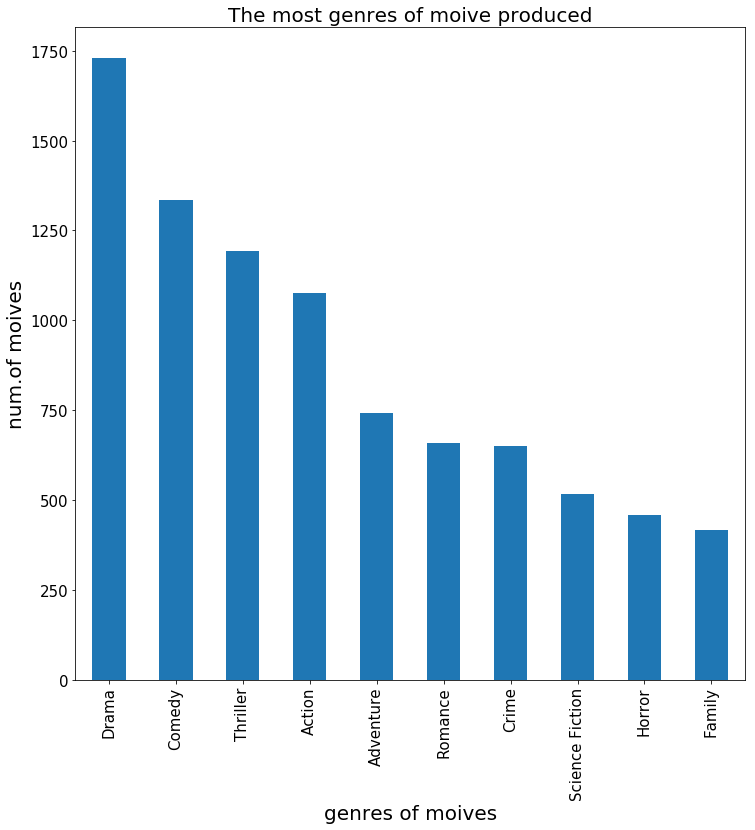

In [18]:
#call function count to compute valuse count of each genres
genres=count('genres')
genres=genres.head(10)
genres.plot.bar(fontsize=15).figure.set_size_inches(12, 12)
plt.ylabel('num.of moives', fontsize=20);
plt.xlabel('genres of moives', fontsize=20);
plt.title("The most genres of moive produced",fontsize=20);

> Through this figure, which illustrates the 10 most prolific types of films, we find that the most dramatic films are followed by the comedian.

### Research Question 2  (The most companies producing moives ?)

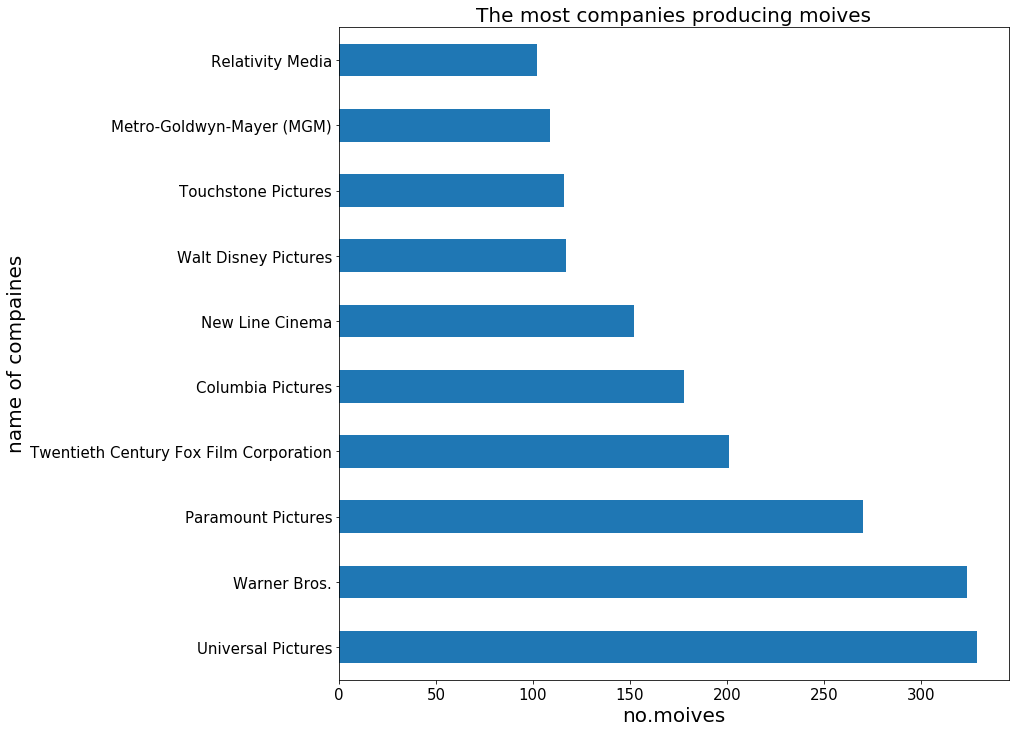

In [19]:
#call function count to compute valuse count of each company
df_production_companies=count('production_companies')
df_production_companies=df_production_companies.head(10)
df_production_companies.plot.barh(fontsize=15).figure.set_size_inches(12, 12)
plt.xlabel('no.moives', fontsize=20);
plt.ylabel('name of compaines', fontsize=20);
plt.title("The most companies producing moives",fontsize=20);

> It is through this statistic shown in the figure that universal pictures and warner Bros. companies are the ones who have taken over the world of filmmaking.

### Research Question 3  (Most of the moives industry directors ?)

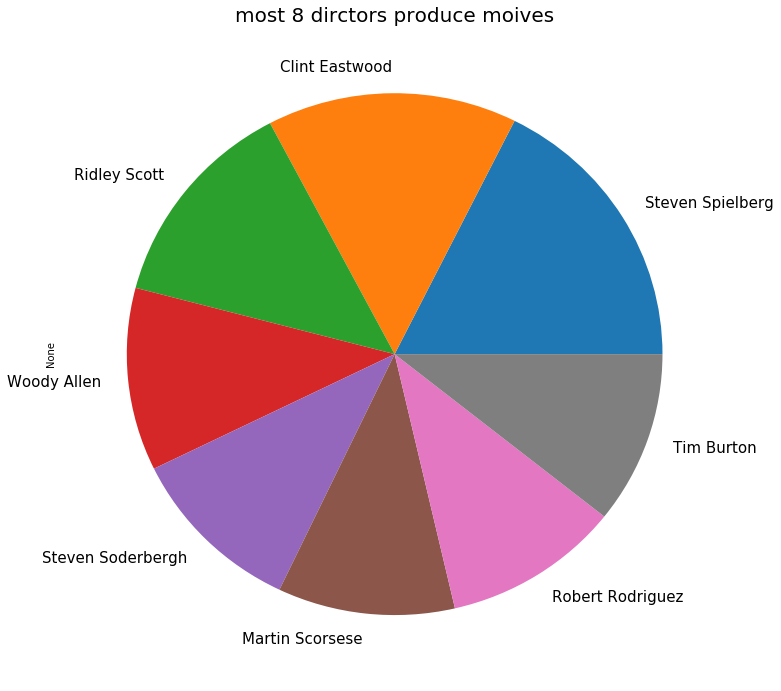

In [20]:
#call function count to compute valuse count of each director
df_directors=count('director')
df_directors=df_directors.head(8)
df_directors.plot.pie(fontsize=15).figure.set_size_inches(12, 12)
plt.title('most 8 dirctors produce moives',fontsize=20);

### Most of representative actor ?

In [21]:
actor=count('cast')
actor.head(1)

Robert De Niro    52
dtype: int64

> Actor Robert De Niro is considered the most representative actor with 52 moives so far.

### Research Question 4  (Show the relationship between popularity of moives and release year ?)

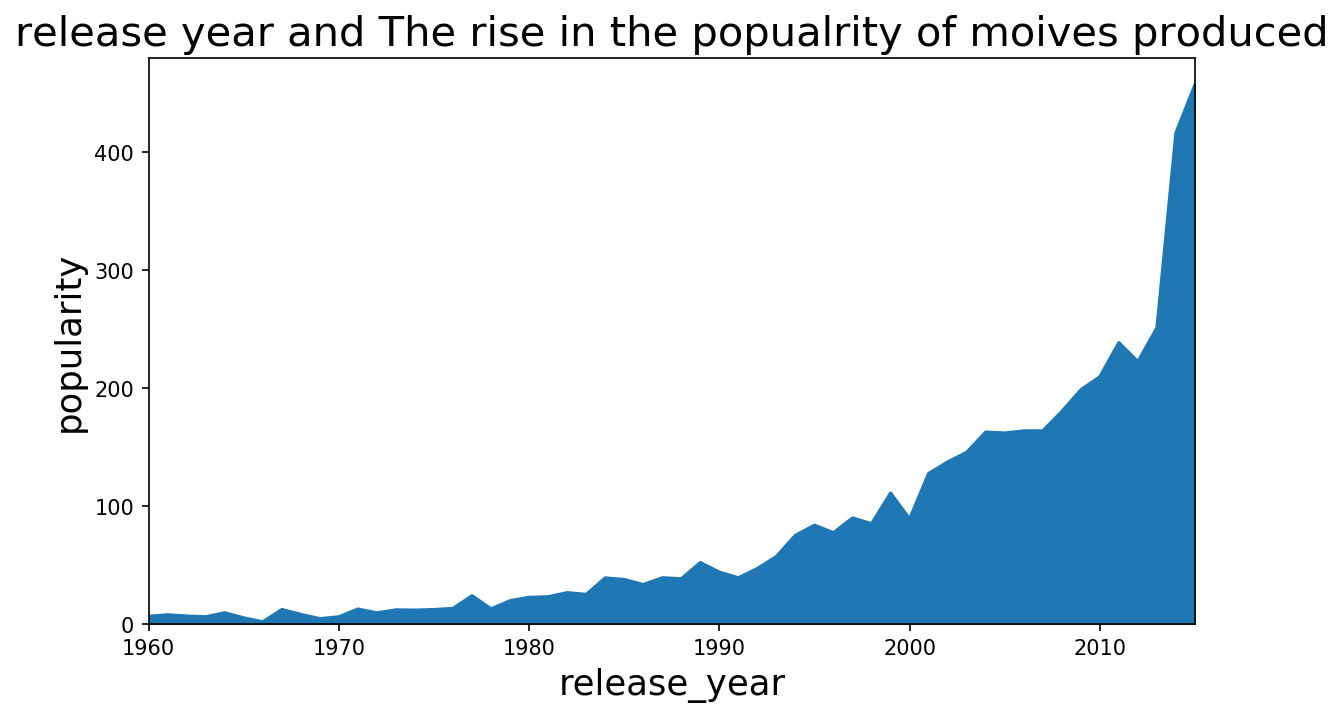

In [22]:
df_years=group('release_year','popularity')
plt.figure(figsize=(9,5), dpi = 150)
plt.xlabel('release year',fontsize=17)
plt.ylabel('popularity',fontsize=17)
plt.title("release year and The rise in the popualrity of moives produced",fontsize=20);
df_years.plot.area();

> Over the years the films are becoming increasingly popular worldwide.

### know the moive has the most popularty

In [23]:
df1=themost('popularity')
df1['original_title']

'Jurassic World'

### know the moive has the min budget

In [24]:
df1=themin('budget')
df1['original_title']

'Lost & Found'

### Research Question 5  (Show the relationship between budget of moives and release year ?)

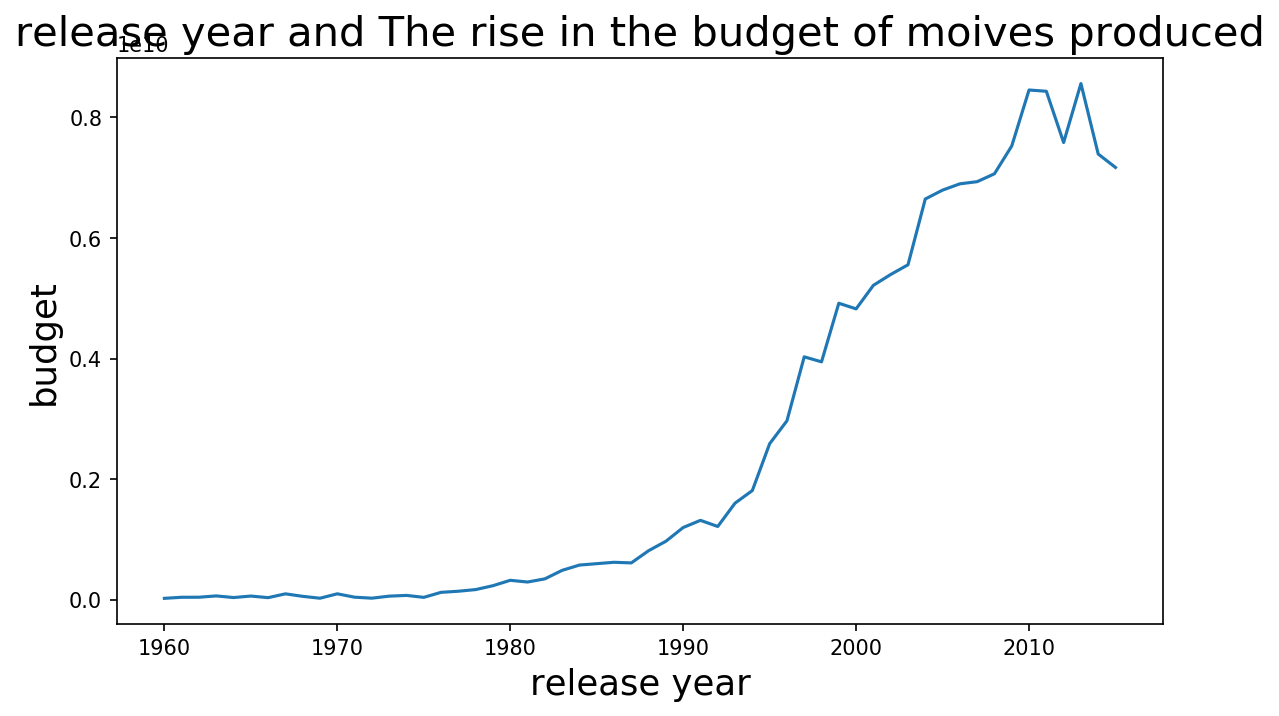

In [25]:
df_releaseBudget=group('release_year','budget')
plt.figure(figsize=(9,5), dpi = 150)
plt.title("release year and The rise in the budget of moives produced",fontsize=20);
plt.xlabel('release year',fontsize=17)
plt.ylabel('budget',fontsize=17)
plt.plot(df_releaseBudget);

> Over the years the companies are pumping more money into the movie industry, and this is evident from the previous graph.

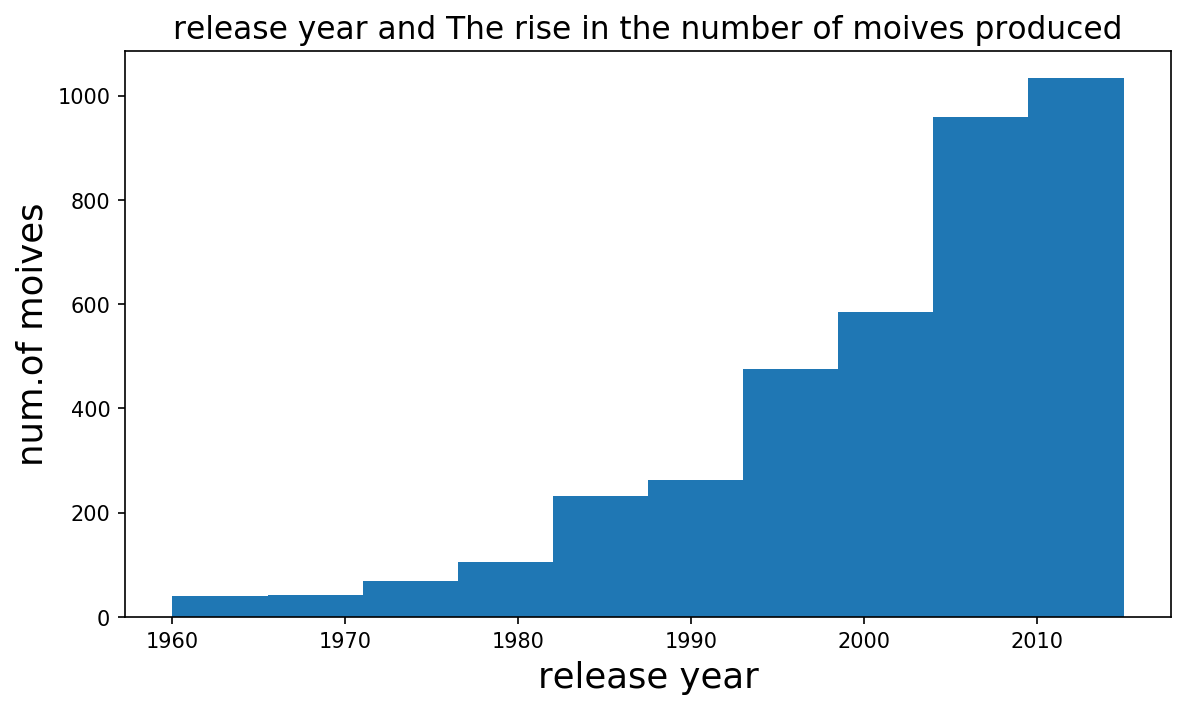

In [26]:
plt.figure(figsize=(9,5), dpi = 150)
plt.xlabel('release year',fontsize=17)
plt.ylabel('num.of moives',fontsize=17)
plt.title("release year and The rise in the number of moives produced",fontsize=15);
plt.hist(df['release_year']);

> Through that figure, statistically correct, companies pump a lot of money into that industry, and this is clear that there is a great increase in the number of films that are made in one year and this number increases year after year.

### The number of moives produced each year

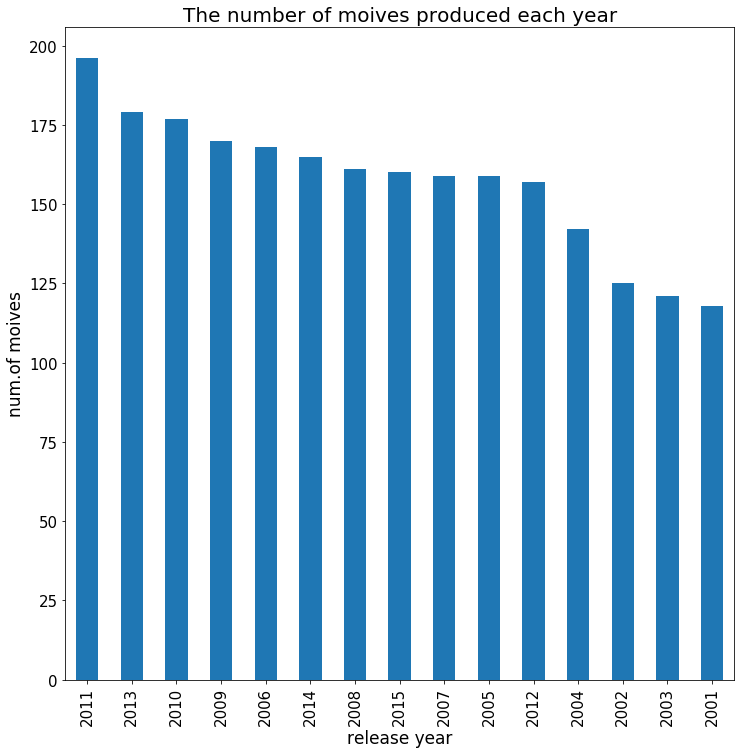

In [27]:
df_count=df.release_year.value_counts()
g=df_count.head(15)
plt.title("The number of moives produced each year",fontsize=20);
plt.xlabel('release year',fontsize=17)
plt.ylabel('num.of moives',fontsize=17)
g.plot.bar(fontsize=15).figure.set_size_inches(12, 12)

In [28]:
#know each year take most revenue of all moives in this year
df_rev=group('release_year','revenue')
df_rev.idxmax()

2015

>Through this statistic, it is not a condition that the year that produces more moives is the year that receives the largest return, and this is evident in that 2011 is the year with the largest number of moives, but 2015 is the year with the largest return, and this indicates that the quality of the films and the acceptance of the viewer is It is she who determines who will get the most return.

<a id='conclusions'></a>
## Conclusions

> **Through this analysis, it was found that the film industry is booming over the years, and this is what encouraged companies to invest in that industry and pump a lot of money because they found that there is a great return to be made from that industry. I will explain in points why the investment is made in the film industry.**<br>
(1)The popularity of moives is increasing frighteningly<br>
(2)Expenses and revenues are greatly greater with each passing year<br>
(3)There are many people working in this industry because they know that it is hugely profitable, and this is evident from the number of actors and directors who make a lot of moives.
### Limitations
>(1)moro row have null values<br>
(2)moro rows is duplicated<br> 
(3)Is the budget and revenue column specified in a specific currency because it is not clear in the dataset<br>
Those things I mentioned are considered to have been determined from the analysis of that evidence, and there could be an incorrect analysis because of it